### Simple Linear Regression

## Author: Rajshekhar Choudhury

### GRIP-TSF December 2020

### Problem Statement: Predict the percentage of an student based on the no. of study hours.

In [31]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [8]:
#LOADING THE DATA 
df=pd.read_csv('http://bit.ly/w-data')

In [11]:
#FIRST FIVE ROWS OF DATA
df.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
#TO PRINT THE SUMMARY OF A DATAFRAME 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
#TO PRINT STATISTICAL SUMMARY OF DATASET
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


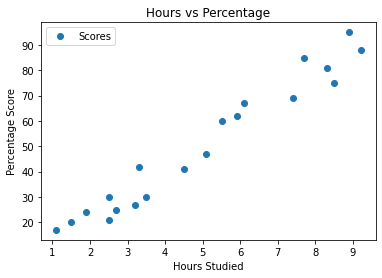

From the above graph,we can clearly see there is a positive linear relationship between the both variables(hours and scores)


In [39]:
# Plotting the distribution of scores
df.head(20).plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
print('From the above graph,we can clearly see there is a positive linear relationship between the both variables(hours and scores)')

### SPLITTING DATA TO TRAIN AND TEST


In [42]:
X = df.head(20).iloc[:, :-1].values  
y = df.head(20).iloc[:, 1].values  

In [43]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [44]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


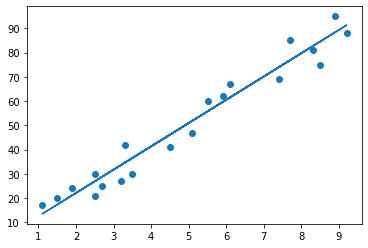

In [45]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### ANALYZING PREDICTIONS USING OUR MODEL

In [52]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[6.1]
 [5.1]
 [7.4]
 [8.3]]


In [47]:
# Comparing Actual vs Predicted data/values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,67,61.511427
1,47,51.900997
2,69,74.004985
3,81,82.654372


In [53]:
#WE WILL TEST FOR OWN DATA
hours=9.25
Ownpred=regressor.predict([[hours]])
print("Number of hours:{}".format(hours))
print("Predicted score:{}".format(Ownpred[0]))

Number of hours:9.25
Predicted score:91.78428042001238


### EVALUATING THE MODE

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.262231977411108
